# EDA on abstract length

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from string import ascii_letters
import re
import nltk
import string

In [2]:
import TextCleaning_updated
import importlib

In [3]:
# reading in raw data

df = pd.read_csv('../../data/original/raw_abstracts.csv',engine='python')
print(df.shape)

(550088, 16)


In [5]:
#importlib.reload(TextCleaning_updated)
df = TextCleaning_updated.remove_nulls(df, "ABSTRACT")
df = TextCleaning_updated.remove_duplicates(df)

3 nulls in  ABSTRACT . These rows removed.
11 duplicate abstracts removed
0 project ID duplicates - not removed


In [6]:
df["working_abstract"] = [abstract.lower().strip() for abstract in df["ABSTRACT"]]

In [7]:
# find length of each abstract

df['length'] = df["working_abstract"].apply(len)

In [8]:
df.head()

,PROJECT_ID,ABSTRACT,FY,FIRST_CHAR,LAST_CHAR,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_TITLE,PROJECT_TERMS,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,ORGANIZATION_NAME,CFDA_CODE,FY_TOTAL_COST,working_abstract,length
0,89996,"This is a project to explore Game-based, Metap...",2008,"This is a project to explore Game-based, Metap...",.,NSF,NSF,NaN,0814512,RUI: CYGAMES: CYBER-ENABLED TEACHING AND LEARN...,Achievement; analog; base; Cognitive Science; ...,"REESE, DEBBIE D","CARTER, BEVERLY; WOOD, CHARLES; HITT, BEN",WHEELING JESUIT UNIVERSITY,47.076,1999467.0,"this is a project to explore game-based, metap...",2057
1,89997,Institution: Franklin Institute Science Museum...,2008,Institution: Franklin Institute Science Museum...,.,NSF,NSF,NaN,0741659,ARIEL - AUGMENTED REALITY FOR INTERPRETIVE AND...,Active Learning; Child; Computer software; des...,"SNYDER, STEVEN","ELINICH, KAREN; YOON, SUSAN",FRANKLIN INSTITUTE,47.076,1799699.0,institution: franklin institute science museum...,2053
2,89998,Through programs (including small group conver...,2008,Through programs (including small group conver...,.,NSF,NSF,NaN,0813522,BRIGHTER FUTURES: PUBLIC DELIBERATION ABOUT TH...,Address; Age; Birth; Brain; Caregivers; Child;...,"FINK, LAURIE KLEINBAUM","CADIGAN, KAREN; ELLENBOGEN, KIRSTEN",SCIENCE MUSEUM OF MINNESOTA,47.076,1505858.0,through programs (including small group conver...,1154
3,89999,In partnership with the American Chemical Soci...,2008,In partnership with the American Chemical Soci...,.,NSF,NSF,NaN,0838627,FOSTERING US-INTERNATIONAL COLLABORATIVE PARTN...,Advanced Development; American; Chemicals; Che...,"JOST, JOHN W","MILLER, BRADLEY; BOWMAN, KATHERINE",INTERNATIONAL UNION OF PURE AND APPLIED CHEMISTRY,47.049,51000.0,in partnership with the american chemical soci...,875
4,90000,Amphibian populations around the world are exp...,2008,Amphibian populations around the world are exp...,.,NSF,NSF,NaN,0815315,COLLABORATIVE RESEARCH: EVOLUTION OF AMPHIBIAN...,Amphibia; Central America; Communicable Diseas...,"ZAMUDIO, KELLY R",NaN,CORNELL UNIVERSITY ITHACA,47.074,370996.0,amphibian populations around the world are exp...,1322


In [9]:
df["working_abstract"][3]

'in partnership with the american chemical society (acs) and the national academy of sciences (nas), the international union of pure and applied chemistry (iupac) will convene two roundtable meetings in conjunction with the acs national meetings in 2008 and 2009. the meetings will promote continued, multinational dialogue on establishing effective programs for funding international collaborative research projects in chemistry; and will also deepen the engagement between the u.s. chemical sciences community, the acs, and the international union.these meetings will stimulate the further development of productive collaborative activities between international research communities and help advance the development of more effective mechanisms for international collaborative research in chemistry. the meetings will be of widespread and enduring benefit to the community.'

(0.0, 8000.0)

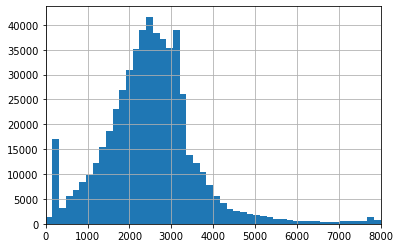

In [10]:
df['length'].hist(bins=200)
plt.xlim([0,8000])

In [11]:
df.groupby('DEPARTMENT').count()

,PROJECT_ID,ABSTRACT,FY,FIRST_CHAR,LAST_CHAR,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_TITLE,PROJECT_TERMS,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,ORGANIZATION_NAME,CFDA_CODE,FY_TOTAL_COST,working_abstract,length
DEPARTMENT,,,,,,,,,,,,,,,,,
DOD,6951,6951,6951,6951,6951,6951,0,6951,6951,6951,6951,3,6951,6722,6075,6951,6951
ED,1456,1456,1456,1456,1456,1456,1361,1456,1456,1456,1455,1019,1456,1336,1340,1456,1456
EPA,1552,1552,1552,1552,1552,1552,0,1552,1552,1552,1552,751,1552,0,1198,1552,1552
HHS,375439,375439,375439,375439,375439,375439,171638,375439,375439,370487,375439,30287,375171,300813,285888,375439,375439
NASA,16006,16006,16006,16006,16006,16006,0,16006,16006,15991,16006,0,15998,16006,14284,16006,16006
NSF,116507,116507,116507,116507,116507,116507,0,116507,116507,116507,116507,43471,116507,116463,106793,116507,116507
USDA,27303,27303,27303,27303,27303,27303,0,27303,27303,27303,27249,10024,27281,27303,10093,27303,27303
VA,4860,4860,4860,4860,4860,4860,3236,4860,4860,4860,4860,248,4860,4860,0,4860,4860


In [12]:
df.groupby('DEPARTMENT')['length'].median()

DEPARTMENT
DOD     4324.0
ED      1775.5
EPA      933.5
HHS     2592.0
NASA     255.0
NSF     2282.0
USDA    1612.0
VA      3431.0
Name: length, dtype: float64

In [13]:
df.groupby('DEPARTMENT')['length'].max()

DEPARTMENT
DOD     12752
ED       7381
EPA      3896
HHS     32000
NASA     4015
NSF      8150
USDA     8957
VA      10853
Name: length, dtype: int64

In [14]:
df.groupby('DEPARTMENT')['length'].min()

DEPARTMENT
DOD      21
ED      180
EPA      20
HHS       1
NASA     15
NSF       6
USDA      1
VA      422
Name: length, dtype: int64

In [15]:
nasa = df[df['DEPARTMENT'] == 'NASA']

In [16]:
len(nasa)

16006

In [17]:
nasa.head()

,PROJECT_ID,ABSTRACT,FY,FIRST_CHAR,LAST_CHAR,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_TITLE,PROJECT_TERMS,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,ORGANIZATION_NAME,CFDA_CODE,FY_TOTAL_COST,working_abstract,length
10,90006,MAPPING / CHARACTERIZATION / AND ANALYSIS OF C...,2008,MAPPING / CHARACTERIZATION / AND ANALYSIS OF C...,p,NASA,NASA,NaN,NNX08BA81G,MAPPING / CHARACTERIZATION / AND ANALYSIS OF C...,Data; Image; instrument; Maps; Radar; Titan,"BURR, DEVON",NaN,UNIVERSITY OF TENNESSEE KNOXVILLE,43.AAA,197533.0,mapping / characterization / and analysis of c...,255
39,90036,INNOVATIVE TECHNOLOGY AND LIFE SCIENCE RESEARC...,2008,INNOVATIVE TECHNOLOGY AND LIFE SCIENCE RESEARC...,e,NASA,NASA,NaN,NNX08BA52A,INNOVATIVE TECHNOLOGY AND LIFE SCIENCE RESEARC...,Biological Sciences; Future; Human; innovative...,"SPILLANE, SEAN M",NaN,CARNEGIE MELLON UNIVERSITY,43.001,1218202.0,innovative technology and life science researc...,254
49,90048,ADAPTIVE CONTROL WITH A PRIORI GUARANTEED PERF...,2008,ADAPTIVE CONTROL WITH A PRIORI GUARANTEED PERF...,m,NASA,NASA,NaN,NNX08BA65A,ADAPTIVE CONTROL WITH A PRIORI GUARANTEED PERF...,Architecture; Metric; Performance,"HOVAKIMYAN, NAIRA",NaN,UNIVERSITY OF ILLINOIS URBANA-CHAMPAIGN,43.AAA,698411.0,adaptive control with a priori guaranteed perf...,255
59,90060,THERMAL EMISSION ANALYSIS OF EXTINCT COMET CAN...,2008,THERMAL EMISSION ANALYSIS OF EXTINCT COMET CAN...,r,NASA,NASA,NaN,NNX08BA78G,THERMAL EMISSION ANALYSIS OF EXTINCT COMET CAN...,Minor Planets,"EMERY, JOSHUA",NaN,UNIVERSITY OF TENNESSEE KNOXVILLE,43.001,53233.0,thermal emission analysis of extinct comet can...,254
67,90069,THE ROLE OF WATER IN THE EARLY FORMATION OF MA...,2008,THE ROLE OF WATER IN THE EARLY FORMATION OF MA...,y,NASA,NASA,NaN,NNX08BA20G,THE ROLE OF WATER IN THE EARLY FORMATION OF MA...,density; Growth; Oceans; Planet Mars; planetar...,"ELKINS-TANTON, LINDA",NaN,MASSACHUSETTS INSTITUTE OF TECHNOLOGY,43.AAA,195437.0,the role of water in the early formation of ma...,254


In [18]:
nasa.groupby('FY')['length'].max()

FY
2008     255
2009     255
2010     255
2011     255
2012     255
2013    4015
2014     255
2015     255
2016     255
2017     255
Name: length, dtype: int64

In [19]:
nasa2013 = nasa[nasa['FY'] == 2013]

In [20]:
len(nasa2013)

1555

In [21]:
nasa2013.head()

,PROJECT_ID,ABSTRACT,FY,FIRST_CHAR,LAST_CHAR,DEPARTMENT,AGENCY,IC_CENTER,PROJECT_NUMBER,PROJECT_TITLE,PROJECT_TERMS,CONTACT_PI_PROJECT_LEADER,OTHER_PIS,ORGANIZATION_NAME,CFDA_CODE,FY_TOTAL_COST,working_abstract,length
301427,463806,"DURING FY14, PI OF THE BLUE MARBLE SPACE INSTI...",2013,"DURING FY14, PI OF THE BLUE MARBLE SPACE INSTI...",.,NASA,NASA,NaN,NNX13AT17G,"DURING FY14, PI OF THE BLUE MARBLE SPACE INSTI...",Aerosols; Award; Chemicals; Environment; Equip...,"CLEAVES, HENDERSON",NaN,BLUE MARBLE SPACE,43.001,24460.0,"during fy14, pi of the blue marble space insti...",1497
301432,464022,"THE UNIVERSITY OF FLORIDA, GAINESVILLE PROPOSE...",2013,"THE UNIVERSITY OF FLORIDA, GAINESVILLE PROPOSE...",.,NASA,NASA,NaN,NNX13AR53A,"THE UNIVERSITY OF FLORIDA, GAINESVILLE PROPOSE...",Alloys; Ally; Award; base; Chemicals; Collabor...,"MANUEL, MICHELE",NaN,UNIVERSITY OF FLORIDA,43.002,58000.0,"the university of florida, gainesville propose...",998
301433,464021,THE RISING STAR EDUCATOR PROGRAM (RSEP) IS FOC...,2013,THE RISING STAR EDUCATOR PROGRAM (RSEP) IS FOC...,.,NASA,NASA,NaN,NNX13AR35A,THE RISING STAR EDUCATOR PROGRAM (RSEP) IS FOC...,Camping; cohort; Community Health Education; E...,"STECKELBERG, MARIE",NaN,SOUTH DAKOTA DISCOVERY CENTER AND AQUARIUM THE,43.008,480261.0,the rising star educator program (rsep) is foc...,807
301437,464053,THE EVOLUTION OF THE CORONAL AND SOLAR WIND PL...,2013,THE EVOLUTION OF THE CORONAL AND SOLAR WIND PL...,.,NASA,NASA,NaN,NNX13AR42G,THE EVOLUTION OF THE CORONAL AND SOLAR WIND PL...,Address; Area; base; Code; Data; data modeling...,"MATTHAEUS, WILLIAM H",NaN,UNIVERSITY OF DELAWARE,43.001,164841.0,the evolution of the coronal and solar wind pl...,3500
301438,464054,SINUOUS CHANNELS IN VOLCANIC PROVINCES ON THE ...,2013,SINUOUS CHANNELS IN VOLCANIC PROVINCES ON THE ...,.,NASA,NASA,NaN,NNX13AQ05G,SINUOUS CHANNELS IN VOLCANIC PROVINCES ON THE ...,Case Study; Characteristics; Data; Diagnostic;...,"HAMILTON, CHRISTOPHER",NaN,PROXEMY RESEARCH INC,43.001,81864.0,sinuous channels in volcanic provinces on the ...,2448


In [22]:
nasa2013['LAST_CHAR'].value_counts()

.    571
E    120
S    101
T     72
N     70
A     70
O     69
R     59
I     51
D     43
L     42
H     33
C     33
U     29
Y     27
M     27
F     20
P     19
G     18
,     13
-      9
W      8
V      7
B      6
K      6
)      5
\      5
0      4
X      3
2      3
Q      2
n      2
'      2
(      2
8      1
1      1
?      1
4      1
Name: LAST_CHAR, dtype: int64

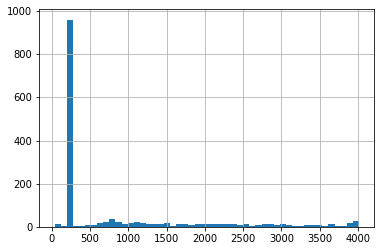

In [23]:
nasa2013['length'].hist(bins=50)